In [13]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
plotly-orca=1.3.1 already installed
Running command `conda install --yes unicodedata2`... ok
Solving environment: ...working... done

# All requested packages already installed.


Importando librerías ...
Las librerías has sido importadas con éxito


In [14]:
data = pd.read_csv("properati.csv")

In [15]:
data_clean = pd.read_csv("CleanCSV/Clean04_Outliers.csv")

<hr id="Graficos">
<h2 style="color: lightblue">GRAFICOS</h2>

### Gráfico con Data original

In [16]:
grupo0= data[["state_name", "price_usd_per_m2"]].groupby("state_name", sort=False)

maxim0 = (grupo0.price_usd_per_m2.mean() + grupo0.price_usd_per_m2.std())
minim0 = (grupo0.price_usd_per_m2.mean() - grupo0.price_usd_per_m2.std())

media0 = grupo0.price_usd_per_m2.mean()              # Media de cada Provincia

media_s_0 = grupo0.price_usd_per_m2.mean().mean()    # Media por Provincias

cant0 = grupo0.price_usd_per_m2.count()

media_s_0

data_arg0 = pd.concat([minim0, maxim0], axis=1, sort=False, join='inner')
data_arg0.columns = ["0", "1"]

media = media0

ics_data = data_arg0
ics_data.head(3)

,0,1
state_name,,
Capital Federal,-564.099642,6797.960531
Bs.As. G.B.A. Zona Sur,405.849005,2644.864793
Buenos Aires Costa Atlántica,658.423859,2490.842387


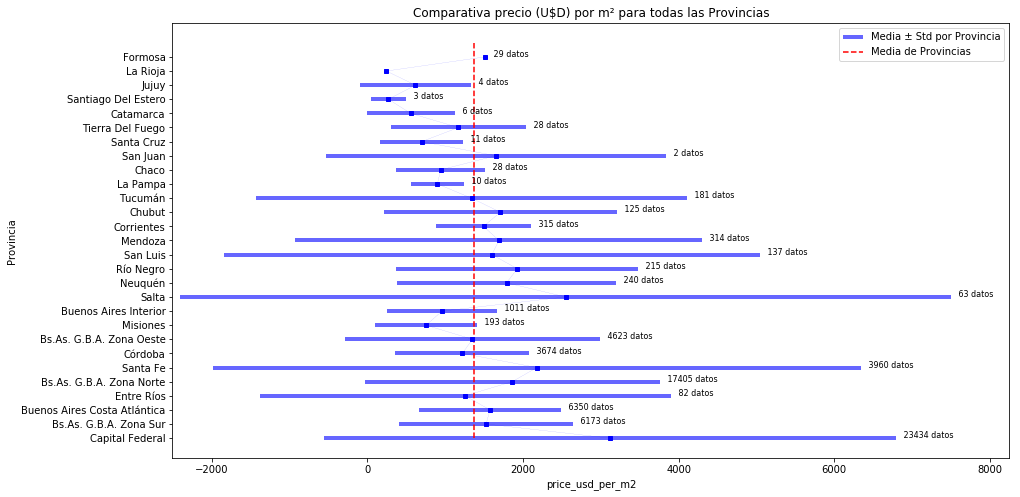

In [17]:
fig = plt.figure(figsize=(15, 8))

y = ics_data.index.values
xmin = ics_data["0"]
xmax = ics_data["1"]

ax = plt.axes(label=y)

ax.hlines(y, xmin, xmax, alpha = 0.6, color = "blue", lw=4, label="Media ± Std por Provincia")

ax.vlines(media_s_0, ics_data.index[0], len(ics_data.index), linestyles="dashed", colors = "red", label="Media de Provincias");

plt.plot(media, y, 'bs--', linewidth=0.1, markersize=4)

for i in range(len(ics_data.index)):
    if not np.isnan(xmax[i]):     # porque xmax[26] es NaN
        ax.text(xmax[i], i, "   "+str(cant0.iloc[i])+" datos", fontsize=8) 

ax.set_xlim(left=((min(xmin))-100), right=(max(xmax)*1.1))

ax.set_ylabel('Provincia')
ax.set_xlabel('price_usd_per_m2')
ax.set_title('Comparativa precio (U$D) por m² para todas las Provincias')
ax.legend();

### Gráfico con Data_Clean

In [18]:
grupo1= data_clean.groupby("state_name", sort=False)

maxim1 = (grupo1.price_usd_per_m2.mean() + grupo1.price_usd_per_m2.std())
minim1 = (grupo1.price_usd_per_m2.mean() - grupo1.price_usd_per_m2.std())

media1 = grupo1.price_usd_per_m2.mean()

media_s_1 = grupo1.price_usd_per_m2.mean().mean()

cant1 = grupo1.price_usd_per_m2.count()

data_arg1 = pd.concat([minim1, maxim1], axis=1, sort=False, join='inner')
data_arg1.columns = ["0", "1"]

media = media1

ics_data = data_arg1
ics_data.head(3)

,0,1
state_name,,
Capital Federal,1603.177039,3259.415969
Bs.As. G.B.A. Zona Sur,829.295647,2188.188170
Buenos Aires Costa Atlántica,835.433931,2357.662828


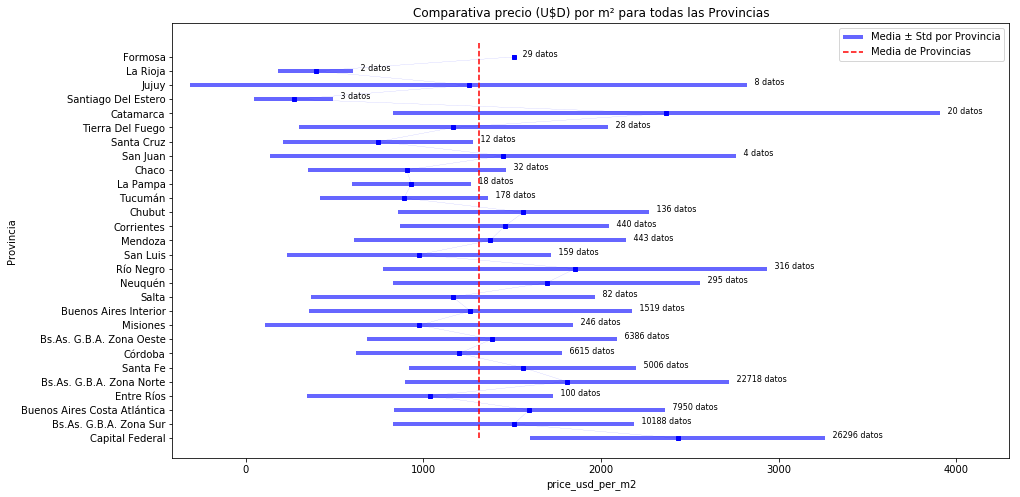

In [19]:
fig = plt.figure(figsize=(15, 8))

y = ics_data.index.values
xmin = ics_data["0"]
xmax = ics_data["1"]

ax = plt.axes(label=y)

ax.hlines(y, xmin, xmax, alpha = 0.6, color = "blue", lw=4, label="Media ± Std por Provincia")
ax.vlines(media_s_1, ics_data.index[0], len(ics_data.index), linestyles="dashed", colors = "red", label="Media de Provincias")

plt.plot(media1, y, 'bs--', linewidth=0.1, markersize=4)

for i in range(len(ics_data.index)):
    if not np.isnan(xmax[i]):     # porque xmax[26] es NaN
        ax.text(xmax[i], i, "   "+str(cant1.iloc[i])+" datos", fontsize=8) 

ax.set_xlim(left=((min(xmin))-100), right=(max(xmax)*1.1))

ax.set_ylabel('Provincia')
ax.set_xlabel('price_usd_per_m2')
ax.set_title('Comparativa precio (U$D) por m² para todas las Provincias')
ax.legend();

<span style="font-size:18px">% DE REDUCCION DE NULOS<span>

In [20]:
priceAproxUSDNulosInicio = data.price_aprox_usd.isnull().sum()
priceUSDPerM2NulosInicio = data.price_usd_per_m2.isnull().sum()
surfaceTotalInM2NulosInicio = data.surface_total_in_m2.isnull().sum()

In [21]:
print(data.price_aprox_usd.isnull().sum())
print((data_clean.Outliers == "price_aprox_usd").sum())
print(data_clean.price_aprox_usd.isnull().sum())

20410
3413
25211


In [22]:
priceAproxUSDNulosFin = data_clean.price_aprox_usd.isnull().sum() - (data_clean.Outliers == "price_aprox_usd").sum()
priceUSDPerM2NulosFin = data_clean.price_usd_per_m2.isnull().sum() - (data_clean.Outliers == "price_usd_m2").sum()
surfaceTotalInM2NulosFin = data_clean.surface_total_in_m2.isnull().sum() - (data_clean.Outliers == "surface_total").sum()

In [23]:
porcPriceAproxUSDNulos = 100 - (priceAproxUSDNulosFin / priceAproxUSDNulosInicio * 100)
porcPriceUSDPerM2Nulos = 100 - (priceUSDPerM2NulosFin / priceUSDPerM2NulosInicio * 100)
porcSurfaceTotalInM2Nulos = 100 - (surfaceTotalInM2NulosFin / surfaceTotalInM2NulosInicio * 100)
print("% reducción de nulos price_aprox_usd: ", porcPriceAproxUSDNulos)
print("% reducción de nulos price_usd_per_m2: ", porcPriceUSDPerM2Nulos)
print("% reducción de nulos surface_total_in_m2: ", porcSurfaceTotalInM2Nulos)

% reducción de nulos price_aprox_usd:  -6.80058794708475
% reducción de nulos price_usd_per_m2:  46.381385092105006
% reducción de nulos surface_total_in_m2:  63.072111472742066


In [24]:
arrayVariables=["price_aprox_usd", "price_usd_per_m2", "surface_total_in_m2"]

fig = go.Figure(data=[
    go.Bar(name='Antes', x=arrayVariables, y=[priceAproxUSDNulosInicio, priceUSDPerM2NulosInicio, surfaceTotalInM2NulosInicio]),
    go.Bar(name='Después', x=arrayVariables, y=[priceAproxUSDNulosFin, priceUSDPerM2NulosFin, surfaceTotalInM2NulosFin])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()